In [9]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

### To download data for the stocks
Symbols = ["AAPL","GOOGL","FB"]
start = datetime.datetime(2020,2,1)
end = datetime.datetime(2020,10,11)

stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=True)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
        

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
# This contains data for all the stocks
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.244957,199588400,AAPL
2020-02-03,76.074997,78.372498,75.555000,77.165001,76.035561,173788400,AAPL
2020-02-04,78.827499,79.910004,78.407501,79.712502,78.545776,136616400,AAPL
2020-02-05,80.879997,81.190002,79.737503,80.362503,79.186256,118826800,AAPL
2020-02-06,80.642502,81.305000,80.065002,81.302498,80.112495,105425600,AAPL


In [57]:
#Seperate the data for each stock/company
google = stock_final[stock_final["Name"]=="GOOGL"]
google.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2020-01-31,1467.859985,1469.670044,1427.060059,1432.780029,1432.780029,2191100,GOOGL
2020-02-03,1461.650024,1486.300049,1456.609985,1482.599976,1482.599976,3581800,GOOGL
2020-02-04,1454.489990,1467.339966,1422.030029,1445.410034,1445.410034,4794000,GOOGL
2020-02-05,1463.609985,1464.579956,1429.680054,1446.050049,1446.050049,1818800,GOOGL
2020-02-06,1451.979980,1481.560059,1450.479980,1475.969971,1475.969971,1891100,GOOGL


In [36]:
facebook = stock_final[stock_final["Name"]=="FB"]
facebook.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2020-01-31,208.429993,208.690002,201.059998,201.910004,201.910004,31359900,FB
2020-02-03,203.440002,205.139999,202.500000,204.190002,204.190002,15495600,FB
2020-02-04,206.619995,210.600006,205.199997,209.830002,209.830002,19628900,FB
2020-02-05,212.509995,212.729996,208.710007,210.110001,210.110001,12538200,FB
2020-02-06,210.470001,211.190002,209.339996,210.850006,210.850006,10567500,FB


In [37]:
apple = stock_final[stock_final["Name"]=="AAPL"]
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.244957,199588400,AAPL
2020-02-03,76.074997,78.372498,75.555000,77.165001,76.035561,173788400,AAPL
2020-02-04,78.827499,79.910004,78.407501,79.712502,78.545776,136616400,AAPL
2020-02-05,80.879997,81.190002,79.737503,80.362503,79.186256,118826800,AAPL
2020-02-06,80.642502,81.305000,80.065002,81.302498,80.112495,105425600,AAPL


#### Studying the spread between each pair of stocks

In [58]:
AF_spread = apple.Close - facebook.Close

In [59]:
AG_spread = apple.Close - google.Close

In [60]:
GF_spread = google.Close - facebook.Close

In [61]:
AF_spread.head()

Date
2020-01-31   -124.532501
2020-02-03   -127.025002
2020-02-04   -130.117500
2020-02-05   -129.747498
2020-02-06   -129.547508
Name: Close, dtype: float64

### Checking for stationarity over spreads

In [62]:
import matplotlib.pyplot as plt

The mean of the spread is : -134.1697312701832


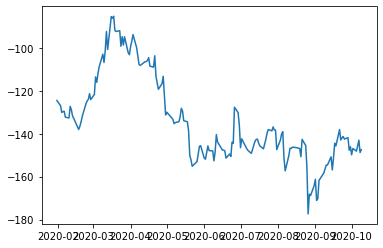

In [65]:
print("The mean of the spread is :",AF_spread.mean())
plt.plot(AF_spread)
plt.show()

The mean of the spread is : -1320.6718361160972


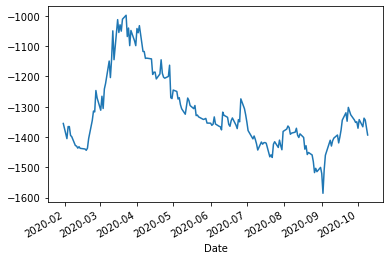

In [66]:
print("The mean of the spread is :",AG_spread.mean())
AG_spread.plot()
plt.show()

The mean of the spread is : 1186.502104845914


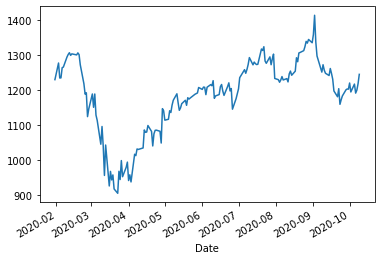

In [69]:
print("The mean of the spread is :",GF_spread.mean())
GF_spread.plot()
plt.show()

#### ADFULLER TEST

In [70]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(GF_spread)

In [71]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.188166
p-value: 0.210568
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
